<a href="https://colab.research.google.com/github/pascale25/DeeP_learning_portfolio/blob/master/linear_reg_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

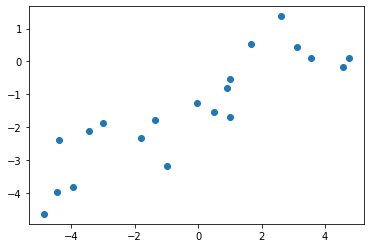

In [33]:
n=20
X = np.random.random(n)*10 -5 # random data on the x_axis in (-5, +5)
Y = 0.5 * X - 1 + np.random.randn(n) # a line plus some noice, slop = 0.5, yintercep=-1
plt.scatter(X,Y);

In [34]:
print(X), print(X.shape), print(Y), print(Y.shape)

[-3.00301891  1.67087334 -4.84776226  0.49826298  3.55439008 -1.36492852
  1.0166737  -3.9450631   1.01065089  4.55968286 -3.45038696 -4.36483626
 -1.79542815 -0.98194801 -4.45105377  2.61359304 -0.02621333  0.91317004
  4.74098593  3.1062245 ]
(20,)
[-1.88621201  0.5424366  -4.64721393 -1.54731083  0.10452448 -1.78411826
 -1.68331946 -3.83918528 -0.54221949 -0.16778162 -2.12964957 -2.39182811
 -2.33534101 -3.18205658 -3.97155115  1.37835736 -1.25330613 -0.81942883
  0.10244959  0.43455325]
(20,)


(None, None, None, None)

In [35]:
# creat the linear regression model
model = nn.Linear(1,1)
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [36]:
# reshape the data ----- (num samples x num_dimensions)
X = X.reshape(n,1)
Y = Y.reshape(n, 1)
print(X[0:2])

[[-3.00301891]
 [ 1.67087334]]


In [37]:
# pytorch uses float 32 by default, nympy creat float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(y.astype(np.float32))

In [38]:
type(inputs)

torch.Tensor

In [39]:
# train the model
epochs = 30
losses = []
for it in range (epochs):
  #zero the parameter gradients
  optimizer.zero_grad()
  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)
  # keep the loss, so we can plot it later
  losses.append(loss.item())
  # backward and optimizer
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{epochs}, Loss: {loss.item():4f}")



Epoch 1/30, Loss: 2.360268
Epoch 2/30, Loss: 2.134681
Epoch 3/30, Loss: 1.979552
Epoch 4/30, Loss: 1.872805
Epoch 5/30, Loss: 1.799303
Epoch 6/30, Loss: 1.748664
Epoch 7/30, Loss: 1.713757
Epoch 8/30, Loss: 1.689681
Epoch 9/30, Loss: 1.673068
Epoch 10/30, Loss: 1.661599
Epoch 11/30, Loss: 1.653679
Epoch 12/30, Loss: 1.648206
Epoch 13/30, Loss: 1.644424
Epoch 14/30, Loss: 1.641809
Epoch 15/30, Loss: 1.640000
Epoch 16/30, Loss: 1.638749
Epoch 17/30, Loss: 1.637883
Epoch 18/30, Loss: 1.637283
Epoch 19/30, Loss: 1.636868
Epoch 20/30, Loss: 1.636581
Epoch 21/30, Loss: 1.636382
Epoch 22/30, Loss: 1.636244
Epoch 23/30, Loss: 1.636148
Epoch 24/30, Loss: 1.636082
Epoch 25/30, Loss: 1.636036
Epoch 26/30, Loss: 1.636004
Epoch 27/30, Loss: 1.635982
Epoch 28/30, Loss: 1.635967
Epoch 29/30, Loss: 1.635956
Epoch 30/30, Loss: 1.635949


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


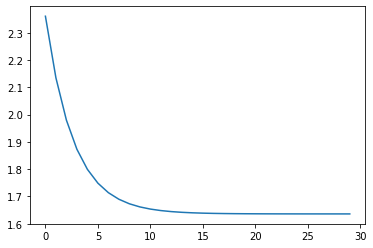

In [40]:
plt.plot(losses);

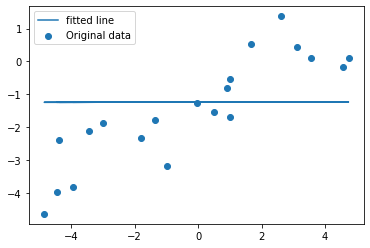

In [46]:
from torch.nn.modules import PairwiseDistance
# plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X,Y, label ='Original data')
plt.plot(X, predicted, label = "fitted line")
plt.legend()
plt.show()

In [42]:
model(inputs)

tensor([[-1.2432],
        [-1.2379],
        [-1.2453],
        [-1.2392],
        [-1.2358],
        [-1.2413],
        [-1.2386],
        [-1.2442],
        [-1.2386],
        [-1.2346],
        [-1.2437],
        [-1.2447],
        [-1.2418],
        [-1.2409],
        [-1.2448],
        [-1.2368],
        [-1.2398],
        [-1.2388],
        [-1.2344],
        [-1.2363]], grad_fn=<AddmmBackward0>)

In [43]:
model(inputs).detach().numpy()

array([[-1.2431728],
       [-1.2379051],
       [-1.2452518],
       [-1.2392267],
       [-1.2357825],
       [-1.2413266],
       [-1.2386425],
       [-1.2442344],
       [-1.2386492],
       [-1.2346494],
       [-1.2436769],
       [-1.2447075],
       [-1.2418118],
       [-1.2408949],
       [-1.2448047],
       [-1.2368428],
       [-1.2398179],
       [-1.2387592],
       [-1.2344451],
       [-1.2362876]], dtype=float32)

In [44]:
# another way to make prediction
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-1.2431728],
       [-1.2379051],
       [-1.2452518],
       [-1.2392267],
       [-1.2357825],
       [-1.2413266],
       [-1.2386425],
       [-1.2442344],
       [-1.2386492],
       [-1.2346494],
       [-1.2436769],
       [-1.2447075],
       [-1.2418118],
       [-1.2408949],
       [-1.2448047],
       [-1.2368428],
       [-1.2398179],
       [-1.2387592],
       [-1.2344451],
       [-1.2362876]], dtype=float32)

In [45]:
# inspect model parameters , are there close to true value
# true values are  w = 0.5, b = -1
w = model.weight.data.numpy()
b=model.bias.data.numpy()
print(w,b)

[[0.00112701]] [-1.2397883]
